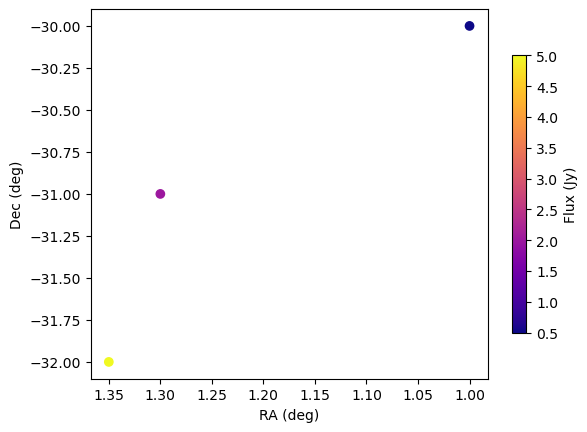

In [4]:

  >>> import os
  >>> import numpy as np
  >>> import matplotlib.pyplot as plt # doctest: +SKIP
  >>> from pyradiosky import SkyModel
  >>> from pyradiosky.data import DATA_PATH
  >>> from astropy import units
  >>> from astropy.coordinates import (
  ...     SkyCoord,
  ...     EarthLocation,
  ...     Angle,
  ...     AltAz,
  ...     Longitude,
  ...     Latitude,
  ...     Galactic)
  >>> sm = SkyModel()

  >>> # This is a small test catalog file with three components
  >>> filename = os.path.join(DATA_PATH, "pointsource_catalog.txt")
  >>> sm.read_text_catalog(filename)

  >>> # First, just plot the component locations and flux
  >>> _ = plt.scatter(x=sm.ra, y=sm.dec, c=sm.stokes[0,0,:].value, cmap="plasma")
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.75)
  >>> _ = plt.xlim(max(sm.ra.value), min(sm.ra.value))
  >>> plt.autoscale()
  >>> _ = plt.xlabel("RA (deg)")
  >>> _ = plt.ylabel("Dec (deg)")
  >>> plt.show() # doctest: +SKIP


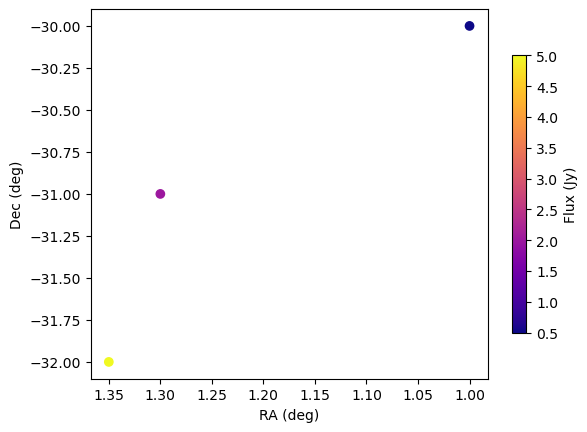

In [9]:
  >>> # Now split the catalog up using the select method
  >>> sm2 = sm.select(lon_range = Longitude([1.0, 1.31], units.deg), inplace=False)
  >>> sm3 = sm.select(lon_range = Longitude([1.31, 1.36], units.deg), inplace=False)

  >>> # Recombine the catalog using the concat method
  >>> sm_new = sm2.concat(sm3, inplace=False)

  >>> _ = plt.scatter(x=sm_new.ra, y=sm_new.dec, c=sm_new.stokes[0,0,:].value, cmap="plasma")
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.75)
  >>> _ = plt.xlim(max(sm_new.ra.value), min(sm_new.ra.value))
  >>> plt.autoscale()
  >>> _ = plt.xlabel("RA (deg)")
  >>> _ = plt.ylabel("Dec (deg)")
  >>> plt.show() # doctest: +SKIP